In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import glob

TEAMNAME = 'Tokyo Sungoliath'

df = pd.read_csv("/Users/isakakou/Desktop/933699_SUNTvNECG_BI.csv",encoding='latin1')
df.columns
df[['playerName', 'teamName','x_coord','y_coord','x_coord_end','y_coord_end',
    'actionName','ActionTypeName','ActionResultName','qualifier3Name',
    'qualifier4Name','qualifier5Name','Metres','PlayNum',
    'SetNum','sequence_id','playerpositionName','refereeName','assistantreferee1Name','assistantreferee2Name']]
print(df)

        ID    FXID   PLID      playerName  team_id               teamName  \
0        0  933699   5209             NaN     5209       Tokyo Sungoliath   
1        1  933699  26479  Keisuke Moriya     5209       Tokyo Sungoliath   
2        2  933699  37824  Daiki Yamagiwa     5206  Green Rockets Tokatsu   
3        3  933699  24957  Harry Hockings     5209       Tokyo Sungoliath   
4        4  933699  29268       Miyu Arai     5206  Green Rockets Tokatsu   
...    ...     ...    ...             ...      ...                    ...   
3088  3088  933699  23537    Tim Bennetts     5206  Green Rockets Tokatsu   
3089  3089  933699  23537    Tim Bennetts     5206  Green Rockets Tokatsu   
3090  3090  933699  26492   Yutaka Nagare     5209       Tokyo Sungoliath   
3091  3091  933699   5206             NaN     5206  Green Rockets Tokatsu   
3092  3092  933699   5206             NaN     5206  Green Rockets Tokatsu   

      ps_timestamp  ps_endstamp  MatchTime  period  ...  assistantreferee1I

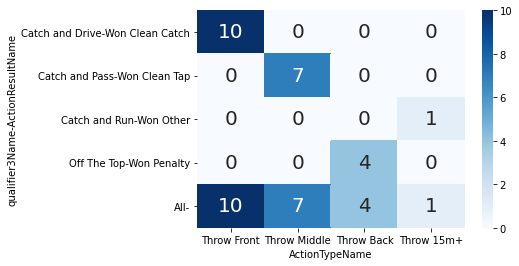

<Figure size 432x288 with 0 Axes>

In [2]:
#チーム名指定でラインアウトデータ取得
df = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = df.loc[df['actionName'] == 'Lineout Throw']
b = pd.crosstab([dfaction['qualifier3Name'],dfaction['ActionResultName']],dfaction['ActionTypeName'],margins=True)
b = b.reindex(columns=['Throw Front', 'Throw Middle', 'Throw Back', 'Throw 15m+'])

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(b,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

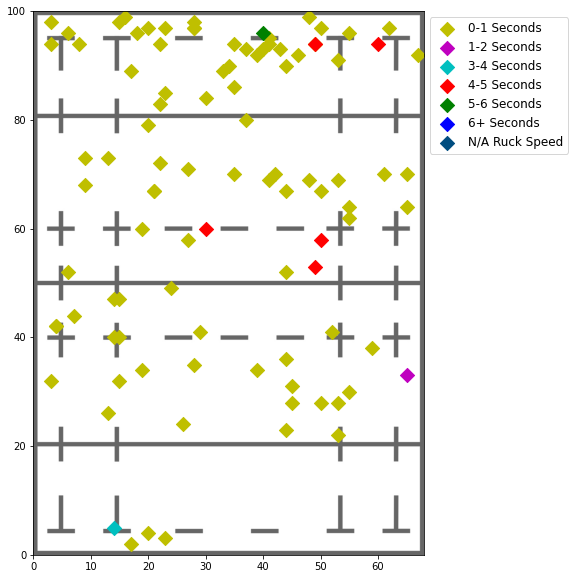

In [3]:
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Ruck']
rspeed = ['0-1 Seconds','1-2 Seconds','3-4 Seconds','4-5 Seconds','5-6 Seconds','6+ Seconds', "N/A Ruck Speed"]
cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(1, 1,1)
plt.xlim(0, 68)
plt.ylim(0,100)

for i in range(len(rspeed)):
    r = dfaction.loc[dfaction['qualifier4Name'] == rspeed[i]]
    plt.scatter(r['y_coord'], r["x_coord"], label=rspeed[i] ,marker = 'D',color=cl[i], s=100)

#背景画像の設定
fig.patch.set_facecolor('white')
im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)

#ラベルの表示
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.gcf().subplots_adjust(wspace=4)


             playerName  MatchTime ActionTypeName
104   Kotaro Matsushima        114     Touch Kick
321      Keisuke Moriya        543    Territorial
364      Ryoto Nakamura        621     Touch Kick
613   Kotaro Matsushima       1550     Touch Kick
671         Naoto Saito       1739            Box
703     Kanji Shimokawa       1827    Territorial
871   Kotaro Matsushima       2104     Touch Kick
915   Kotaro Matsushima       2235     Touch Kick
996   Kotaro Matsushima       2544     Touch Kick
1084  Kotaro Matsushima       2852    Territorial
1150     Keisuke Moriya       3031            Low
1170  Kotaro Matsushima       3256     Touch Kick
1178  Kotaro Matsushima       3308    Territorial
1252  Kotaro Matsushima       3430     Touch Kick
1399  Kotaro Matsushima       3652    Territorial
1406          Tevita Li       3704     Touch Kick
1472  Kotaro Matsushima       3911     Touch Kick
1667     Keisuke Moriya       4043    Territorial
1805  Kotaro Matsushima       4154     Touch Kick


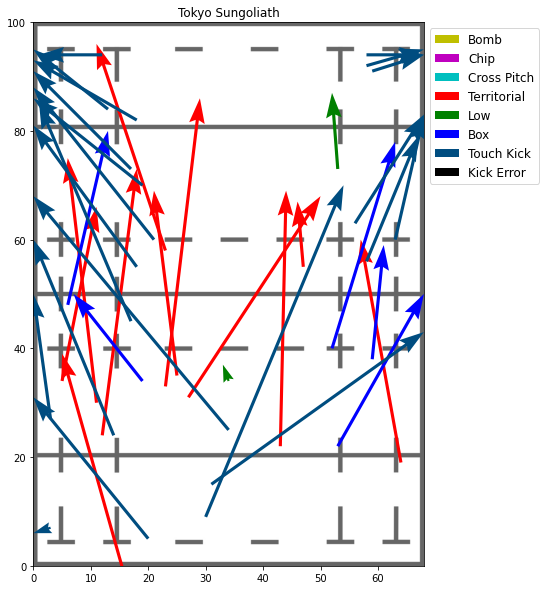

In [4]:
#Kickが入力された場合の処理-----
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Kick']
kicktypes = ['Bomb', 'Chip', 'Cross Pitch', 'Territorial', 'Low', 'Box', 'Touch Kick','Kick Error']
kicks =  dfaction.loc[(dfaction['qualifier3Name'] =='Kick in Play') | (dfaction['qualifier3Name'] == 'Kick in Play (Own 22)')]

cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(1, 1,1)
plt.xlim(0, 68)
plt.ylim(0,100)

print(dfaction[['playerName','MatchTime','ActionTypeName']])
for i in range(len(kicktypes)):
    plts = dfaction.loc[dfaction['ActionTypeName']== kicktypes[i]]
    plt.quiver(plts['y_coord'], plts["x_coord"], (plts['y_coord_end']-plts['y_coord']), (plts["x_coord_end"]-plts['x_coord']), angles="xy", scale_units='xy',label= kicktypes[i], color = cl[i], scale=1,width=0.008, headwidth=5, headlength = 8, headaxislength = 7, pivot='tail')
#Kickの処理ここまで------

#背景画像の設定
fig.patch.set_facecolor('white')
im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)

#ラベルの表示
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
plt.title(TEAMNAME)
plt.gcf().subplots_adjust(wspace=4)

In [5]:
dfaction = df.loc[(df['teamName'] == TEAMNAME)]
dfaction = dfaction.loc[dfaction['actionName'] == 'Tackle']
dfaction[['playerName','actionName','ActionResultName','ActionTypeName','qualifier3Name','qualifier4Name','qualifier5Name']]

,playerName,actionName,ActionResultName,ActionTypeName,qualifier3Name,qualifier4Name,qualifier5Name
254,Naoto Saito,Tackle,Try Saver,Other Tackle,NaN,NaN,NaN
267,Shintaro Ishihara,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
268,Harry Hockings,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
283,Naoto Saito,Tackle,Try Saver,Other Tackle,NaN,NaN,NaN
332,Shogo Nakano,Tackle,Complete,Chase Tackle,Assist,Dominant Tackle,NaN
...,...,...,...,...,...,...,...
3055,Shogo Nakano,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
3067,Shunta Nakamura,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
3068,Kenta Kobayashi,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN
3079,Kai Yamamoto,Tackle,Offload Allowed,Line Tackle,NaN,Ineffective Tackle,NaN


0
0-22
1
22-50
2
50-22
3
22-100


<ipython-input-21-3c84a15700a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaction['x_coord_category'] = np.nan
<ipython-input-21-3c84a15700a9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaction.x_coord_category[(dfaction['x_coord'].astype(int) < Metres_for_area[i+1]) & (dfaction['x_coord'].astype(int) >= Metres_for_area[i])] = areas[i]
/Users/isakakou/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation:

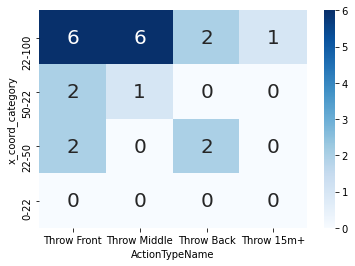

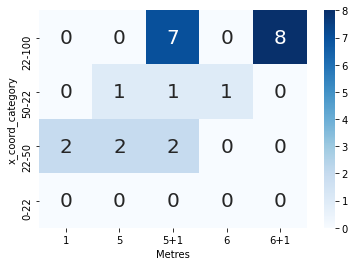

<Figure size 432x288 with 0 Axes>

In [21]:
#TODO エリアごとにラインアウトを整理する
df = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = df.loc[df['actionName'] == 'Lineout Throw']

areas = ['0-22','22-50','50-22','22-100']
Metres_for_area = [0,22,50,73,100]

dfaction['x_coord_category'] = np.nan

for i in range(len(areas)):
    print(i)
    print(areas[i])
    dfaction.x_coord_category[(dfaction['x_coord'].astype(int) < Metres_for_area[i+1]) & (dfaction['x_coord'].astype(int) >= Metres_for_area[i])] = areas[i]

lineout_each_area = pd.crosstab(dfaction['x_coord_category'],dfaction['ActionTypeName'],margins=True).reindex(columns=['Throw Front', 'Throw Middle', 'Throw Back', 'Throw 15m+'],index=list(reversed(areas))).fillna(0)
lineout_each_area
lineout_member_each_area = pd.crosstab(dfaction['x_coord_category'],dfaction['Metres']).reindex(index=list(reversed(areas))).fillna(0)

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(lineout_each_area,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

plt.gcf().subplots_adjust(wspace=4)
sns.heatmap(lineout_member_each_area,cmap='Blues', annot=True,annot_kws={'size':20})
plt.show()
plt.clf()

In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import glob

TEAMNAME = 'Kubota Spears'

# パスで指定したファイルの一覧をリスト形式で取得.
csv_files = glob.glob('/Users/isakakou/Desktop/22-23_Stats/*.csv')

#読み込むファイルのリストを表示
for a in csv_files:
    print(a)

#csvファイルの中身を追加していくリストを用意
data_list = []

#読み込むファイルのリストを走査
for file in csv_files:
    data_list.append(pd.read_csv(file,encoding='latin1'))
    print(file)

#リストを全て行方向に結合
#axis=0:行方向に結合, sort
df = pd.concat(data_list, axis=0, sort=True)

# df.to_csv("/Users/isakakou/Desktop/22-23_Stats/total.csv",index=False)

#Kickが入力された場合の処理-----
dfaction = df.loc[(df['teamName'] == TEAMNAME)]

dfaction = dfaction.loc[dfaction['actionName'] == 'Kick']
kicktypes = ['Bomb', 'Chip', 'Cross Pitch', 'Territorial', 'Low', 'Box', 'Touch Kick','Kick Error']
kicks = dfaction.loc[(dfaction['qualifier3Name'] =='Kick in Play') | (dfaction['qualifier3Name'] == 'Kick in Play (Own 22)')]

cl = ['y','m', 'c', 'r', 'g', 'b', (0,0.3,0.5), (0,0,0)]
players = kicks.drop_duplicates(subset=['playerName'],keep='first')
player_list = players['playerName'].reset_index(drop=True)
print(player_list)

for p in range(len(player_list)):
    fig = plt.figure(figsize=(7, 10))
    ax = fig.add_subplot(1, 1,1)
    plt.xlim(0, 68)
    plt.ylim(0,100)
    for i in range(len(kicktypes)):
        plts = dfaction.loc[(dfaction['ActionTypeName']== kicktypes[i])&(dfaction['playerName'] == player_list[p])]
        plt.quiver(plts['y_coord'], plts["x_coord"], (plts['y_coord_end']-plts['y_coord']), (plts["x_coord_end"]-plts['x_coord']), angles="xy", scale_units='xy',label= kicktypes[i], color = cl[i], scale=1,width=0.008, headwidth=5, headlength = 8, headaxislength = 7, pivot='tail')
    #Kickの処理ここまで------

    #背景画像の設定
    fig.patch.set_facecolor('white')
    im = Image.open(os.getcwd()+"/Resources/FIELD_image.jpeg")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.imshow(im, extent=[*xlim, *ylim], aspect='auto', alpha=0.6)
    position = dfaction.loc[dfaction['playerName'] == player_list[p]]['playerpositionName'].drop_duplicates(keep='first').reset_index(drop=True)

    #ラベルの表示
    lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)
    plt.title(player_list[p] + "\n Position: " + position[0])
    plt.gcf().subplots_adjust(wspace=4)
    plt.show()

NameError: name 'csv_files' is not defined